In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [8]:
customers = pd.read_csv('Mall_Customers.csv', index_col=False)

In [9]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


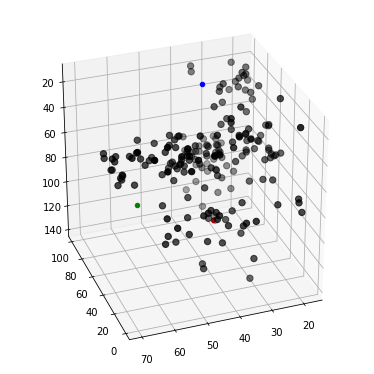

In [19]:
## Initialization
np.random.seed(200)
k = 3

# Define upper and lower bounds of data
xLower = customers['Age'].min()
xUpper = customers['Age'].max()
yLower = customers['Spending Score (1-100)'].min()
yUpper = customers['Spending Score (1-100)'].max()
zLower = customers['Annual Income (k$)'].min()
zUpper = customers['Annual Income (k$)'].max()

# Randomly assign 3 centroids
centroids = {
    i+1: [np.random.randint(xLower,xUpper), np.random.randint(yLower,yUpper), np.random.randint(zLower,zUpper)]
    for i in range(k)
}


# Plot centroids and data
fig = plt.figure(1, figsize=(5, 5))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(customers['Age'], customers['Spending Score (1-100)'], customers['Annual Income (k$)'],
          c='k', cmap=plt.cm.Set1, edgecolor='k', s=40)
col_map = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    ax.scatter(*centroids[i], color=col_map[i])

plt.show()

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   distance_from_1  distance_from_2  distance_from_3  closest color  
0        75.716577        88.011363        54.708317        3     b  
1        96.171721        89.005618        20.518285        3     b  
2        72.013888        98.615415        85.988371        1     r  
3        92.357999        86.226446        20.928450        3     b  
4        71.091490        81.074040        51.458721        3     b  


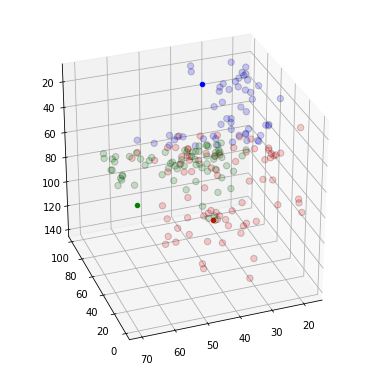

In [25]:
## Assignment
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['Age'] - centroids[i][0]) ** 2
                + (df['Spending Score (1-100)'] - centroids[i][1]) ** 2
                + (df['Annual Income (k$)'] - centroids[i][2]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: col_map[x])
    return df

customers = assignment(customers, centroids)
print(customers.head())

fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(customers['Age'], customers['Spending Score (1-100)'], customers['Annual Income (k$)'],
          c=customers['color'], cmap=plt.cm.Set1, edgecolor='k', s=40, alpha=0.2)
for i in centroids.keys():
    ax.scatter(*centroids[i], color=col_map[i])

plt.show()

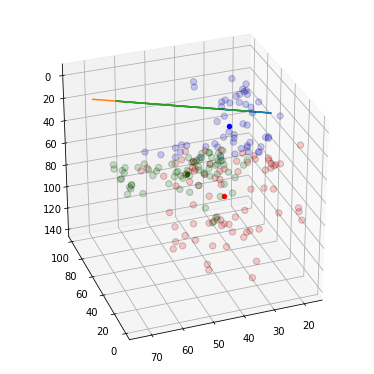

In [29]:
## Update
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(customers[customers['closest'] == i]['Age'])
        centroids[i][1] = np.mean(customers[customers['closest'] == i]['Spending Score (1-100)'])
        centroids[i][2] = np.mean(customers[customers['closest'] == i]['Annual Income (k$)'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(5,5))
ax1 = plt.axes()
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(customers['Age'], customers['Spending Score (1-100)'], customers['Annual Income (k$)'],
          c=customers['color'], cmap=plt.cm.Set1, edgecolor='k', s=40, alpha=0.2)
for i in centroids.keys():
    ax.scatter(*centroids[i], color=col_map[i])

for i in old_centroids.keys():
    ax.plot(old_centroids[i], centroids[i])
plt.show()

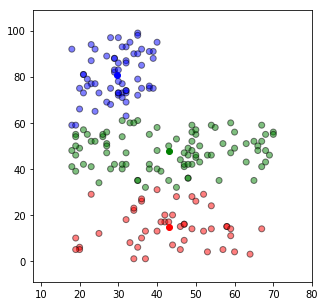

In [46]:
# Continue assignment and update until assigned categories do not change anymore
while True:
    closest_centroids = customers['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(customers, centroids)
    if closest_centroids.equals(customers['closest']):
        break

fig = plt.figure(figsize=(5,5))
plt.scatter(customers['Age'], customers['Spending Score (1-100)'], color=customers['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=col_map[i])
plt.xlim(xLower-10,xUpper+10)
plt.ylim(yLower-10,yUpper+10)
plt.show()